<a href="https://colab.research.google.com/github/RShoose/Data/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загружаем и смотрим на датасет COCO-2017

In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2024-01-25 14:54:45--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.28.215, 52.217.91.188, 52.217.231.161, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.28.215|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  47.8MB/s    in 6m 33s  

2024-01-25 15:01:18 (46.9 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2024-01-25 15:01:18--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.165.177, 3.5.28.177, 54.231.162.249, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.165.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[============

#### Распакуем архив

In [ ]:
from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
          zfile.extractall(extract_path)
        # remove zipfile
          zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)
extract_train_path = "./coco_train2017"
extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"
extract_zip_file(extract_train_path)
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

#### Создаем класс COCOParser для работы с датасетом

In [ ]:
from collections import defaultdict
import json
import numpy as np
class COCOParser:
    def __init__(self, anns_file, imgs_dir):
        with open(anns_file, 'r') as f:
          coco = json.load(f)

          self.annIm_dict = defaultdict(list)
          self.cat_dict = {}
          self.annId_dict = {}
          self.im_dict = {}
          self.licenses_dict = {}

          for ann in coco['annotations']:
            self.annIm_dict[ann['image_id']].append(ann)
            self.annId_dict[ann['id']]=ann
          for img in coco['images']:
            self.im_dict[img['id']] = img
          for cat in coco['categories']:
            self.cat_dict[cat['id']] = cat
          for license in coco['licenses']:
            self.licenses_dict[license['id']] = license

    def get_imgIds(self):
        return list(self.im_dict.keys())
    def get_annIds(self, im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]
    def load_anns(self, ann_ids):
        im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
        return [self.annId_dict[ann_id] for ann_id in ann_ids]
    def load_cats(self, class_ids):
        class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
        return [self.cat_dict[class_id] for class_id in class_ids]
    def get_imgLicenses(self,im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
        return [self.licenses_dict[lic_id] for lic_id in lic_ids]

#### Напишем несколько функций для получения данных

In [ ]:
    def get_imgIds(self):
        return list(self.im_dict.keys())

In [ ]:
    def get_annIds(self, im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]


In [ ]:
    def load_anns(self, ann_ids):
        im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
        return [self.annId_dict[ann_id] for ann_id in ann_ids]

In [ ]:
    def load_cats(self, class_ids):
        class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
        return [self.cat_dict[class_id] for class_id in class_ids]

In [ ]:
    def get_imgLicenses(self,im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
        return [self.licenses_dict[lic_id] for lic_id in lic_ids]

#### Создаем экземпляр класса

In [ ]:
coco_annotations_file="/content/coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="/content/coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)



#### Посмотрим несколько объектов датасета с аннотациями

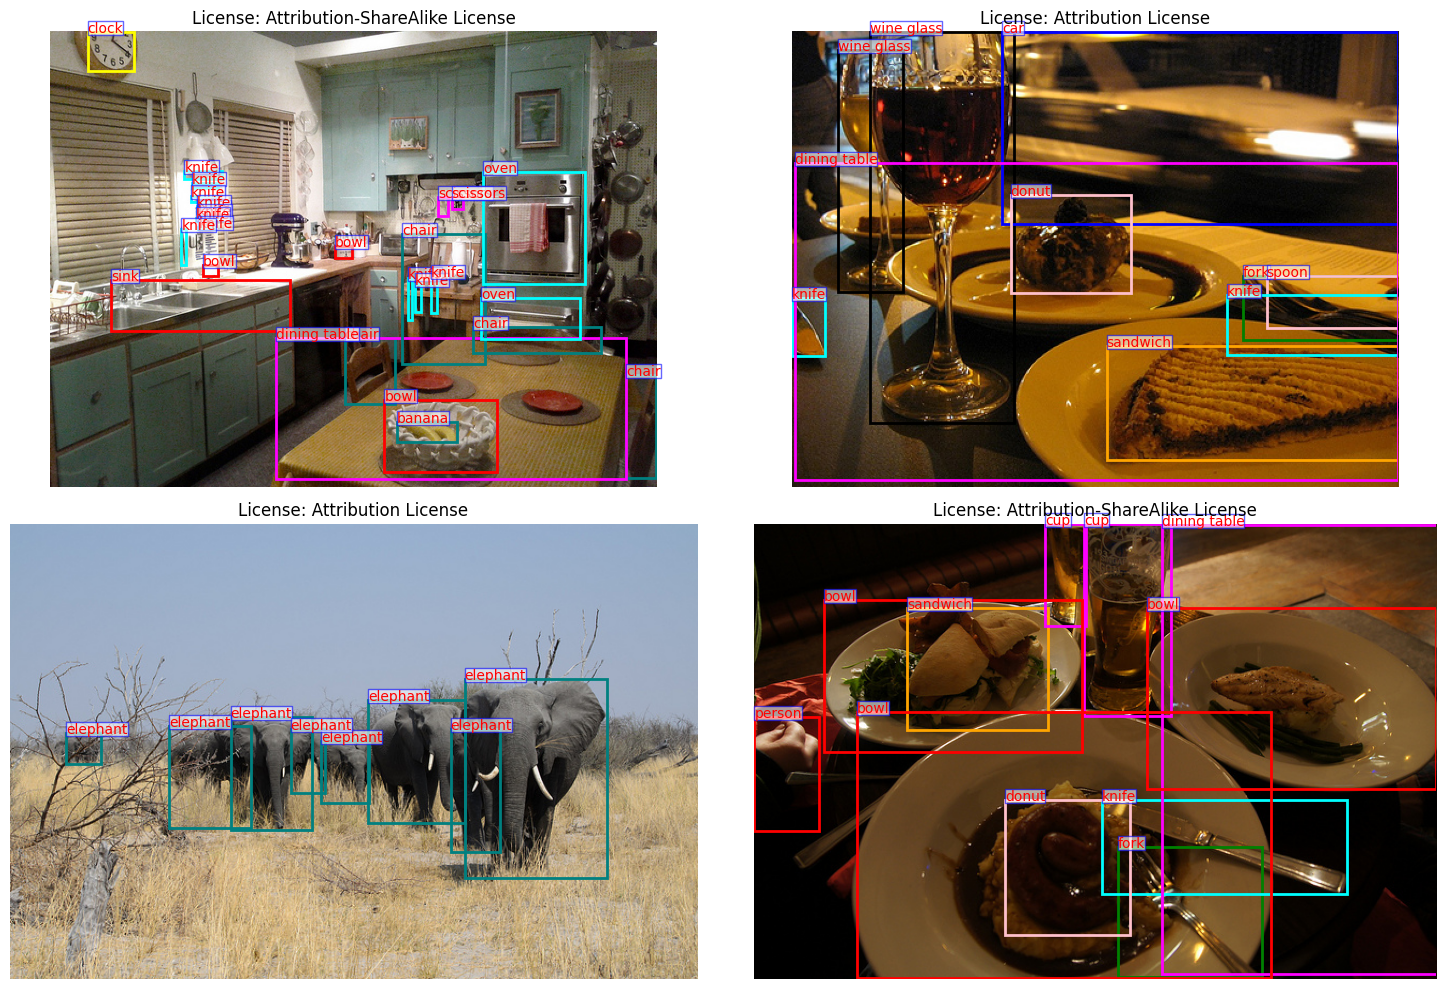

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# define a list of colors for drawing bounding boxes
color_list = ["pink", "red", "teal", "blue", "orange", "yellow", "black", "magenta","green","aqua"]*10
num_imgs_to_disp = 4
total_images = len(coco.get_imgIds()) # total number of images
sel_im_idxs = np.random.permutation(total_images)[:num_imgs_to_disp]
img_ids = coco.get_imgIds()
selected_img_ids = [img_ids[i] for i in sel_im_idxs]
ann_ids = coco.get_annIds(selected_img_ids)
im_licenses = coco.get_imgLicenses(selected_img_ids)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax = ax.ravel()
for i, im in enumerate(selected_img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)
    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = [int(b) for b in bbox]
        class_id = ann["category_id"]
        class_name = coco.load_cats(class_id)[0]["name"]
        license = coco.get_imgLicenses(im)[0]["name"]
        color_ = color_list[class_id]
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color_, facecolor='none')
        t_box=ax[i].text(x, y, class_name,  color='red', fontsize=10)
        t_box.set_bbox(dict(boxstyle='square, pad=0',facecolor='white', alpha=0.6, edgecolor='blue'))
        ax[i].add_patch(rect)

    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_xlabel('Longitude')
    ax[i].set_title(f"License: {license}")
plt.tight_layout()
plt.show()

#### Посмотрим маски из этого датасета

In [ ]:
from pycocotools.coco import COCO

coco_annotations_file="/content/coco_ann2017/annotations/instances_val2017.json"
coco_annotations_file_tr="/content/coco_ann2017/annotations/instances_train2017.json"

train_annotations = COCO(coco_annotations_file_tr)
valid_annotations = COCO(coco_annotations_file)

loading annotations into memory...
Done (t=17.93s)
creating index...
index created!
loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


In [ ]:
cat_ids = train_annotations.getCatIds(supNms=["person", "vehicle"])
train_img_ids = []
for cat in cat_ids:
    train_img_ids.extend(train_annotations.getImgIds(catIds=cat))

train_img_ids = list(set(train_img_ids))
print(f"Number of training images: {len(train_img_ids)}")

valid_img_ids = []
for cat in cat_ids:
    valid_img_ids.extend(valid_annotations.getImgIds(catIds=cat))

valid_img_ids = list(set(valid_img_ids))
print(f"Number of validation images: {len(valid_img_ids)}")

Number of training images: 74152
Number of validation images: 3125


In [ ]:
import skimage.io as io
import torchvision.transforms.functional as TF

#### Посмотрим на фото из обучающего датасета с id = 40

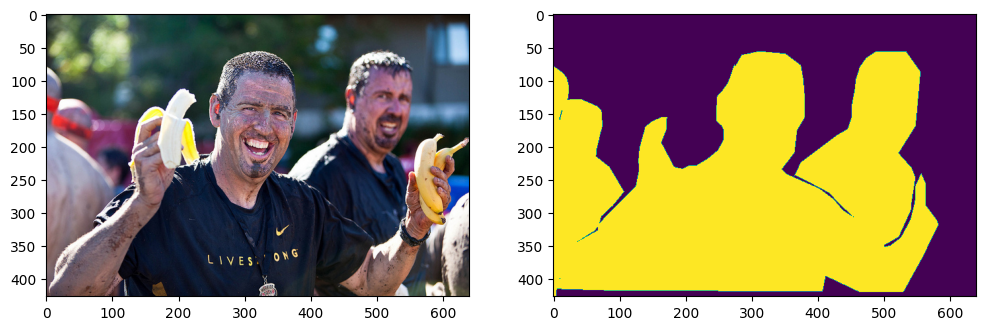

In [ ]:
i = 40
img_data = train_annotations.loadImgs(train_img_ids[i])
ann_ids = train_annotations.getAnnIds(imgIds=img_data[0]['id'], catIds=cat_ids, iscrowd=None)
anns = train_annotations.loadAnns(ann_ids)
mask = np.max(np.stack([train_annotations.annToMask(ann) * ann["category_id"] for ann in anns]), axis=0)

img = io.imread(str("/content/coco_train2017/train2017/" + img_data[0]["file_name"]))
img = img.astype('uint8')
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(TF.to_pil_image(img))
plt.subplot(122)
plt.imshow(mask)
plt.show()

# Создаем и обучаем модель

In [ ]:
from pycocotools.coco import COCO
from PIL import Image
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import Input
from tensorflow.keras import preprocessing
from tensorflow.keras import backend
from tensorflow.keras import utils
from tensorflow.keras import callbacks
from tensorflow.keras import losses

In [ ]:
def create_masks(coco, img_ids, cat_ids, path_to_masks):
    count = 0
    for ID in img_ids: #цикл по индектификаторам изображений
        file_path = os.path.join(path_to_masks, "{0:012d}.jpg".format(ID)) #создаем путь до изображения
        sample_img_ids = coco.getImgIds(imgIds = [ID]) #находим изображение по индексу
        sample_img_dict = coco.loadImgs(sample_img_ids[0])[0] #загружаем словарь с информацией об изображении
        ann_ids = coco.getAnnIds(imgIds=sample_img_dict['id'], catIds=cat_ids, iscrowd=0) #находим индекс аннотации к полученному изображению
        anns = coco.loadAnns(ann_ids) #загружаем аннотацию по индексу
        mask = coco.annToMask(anns[0]) #преобразуем аннотацию в маску
        for i in range(len(anns)):
            mask = mask | coco.annToMask(anns[i]) #объединяем аннотации для каждого объекта на изображении
        mask = Image.fromarray(mask * 255 , mode = "L") #преобразуем массив в картинку
        mask.save(file_path) #сохраняем картинку
        count += 1
    print(f'Created {count} of masks')

def clear_directory(path_to_images, category_images):
    del_img_train = set(os.listdir(path_to_images)) - set(category_images)
    for file_name in del_img_train:
        file_name = os.path.join(path_to_images, file_name)
        if os.path.exists(file_name):
            os.remove(file_name)


def plot_sample_images(coco, path_to_images, count_images=3, filter_classes = ['person']):
    cat_ids = coco.getCatIds(catNms=filter_classes) #получаем метку класса человек
    cats = coco.loadCats(cat_ids) #получаем имена классов
    img_ids = coco.getImgIds(catIds=cat_ids) #список всех файлов, на которых изображены люди
    fig = plt.figure(figsize=(15, 10)) #создаем фигуру
    k = 0
    for _ in range(count_images):
        idx = np.random.randint(0,len(img_ids)) #берем случайное имя файла
        img = coco.loadImgs(img_ids[idx])[0] #загружаем информацию по данному файлу
        image = preprocessing.image.load_img(os.path.join(path_to_images, img['file_name'])) #читаем изображение
        fig.add_subplot(3, 3, k + 1) # добавляем холст для вывода изображений
        plt.imshow(image) #вывод изображения на экран
        plt.title('Image') #даем название холсту
        plt.axis('off') #отключаем оси

        ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None) #получаем аннотацию по людям, изображенным на картинке
        anns = coco.loadAnns(ann_ids) #загружаем информацию об аннотации
        fig.add_subplot(3, 3, k + 2) # добавляем холст для вывода изображений
        plt.imshow(image) #вывод изображения на экран
        plt.title('Annnotation') #даем название холсту
        coco.showAnns(anns)
        plt.axis('off') #отключаем оси

        mask = coco.annToMask(anns[0])
        for i in range(len(anns)):
            mask = mask | coco.annToMask(anns[i]) #преобразуем маску
        fig.add_subplot(3, 3, k + 3) # добавляем холст для вывода изображений
        plt.imshow(mask)
        plt.title('Mask') #даем название холсту
        k += 3
    plt.show()

def plot_sample_predictions(model, generator, count_images=3, filter_classes = ['person']):
    images, masks = generator.__getitem__(np.random.randint(0, len(generator)))
    fig = plt.figure(figsize=(15, 10)) #создаем фигуру
    k = 0
    for i in range(count_images):
        idx = np.random.randint(0, len(images)) #берем случайное имя файла
        fig.add_subplot(3, 3, k + 1) # добавляем холст для вывода изображений
        plt.imshow(images[idx]) #вывод изображения на экран
        plt.title('Image') #даем название холсту
        plt.axis('off') #отключаем оси

        fig.add_subplot(3, 3, k + 2) # добавляем холст для вывода изображений
        plt.imshow(masks[idx]) #вывод изображения на экран
        plt.title('Mask') #даем название холсту
        plt.axis('off') #отключаем оси

        image = images[idx]
        image = images[idx].reshape(1, image.shape[0], image.shape[1], image.shape[2])
        predicted_mask = model.predict(image)
        fig.add_subplot(3, 3, k + 3) # добавляем холст для вывода изображений
        plt.imshow(predicted_mask[0, :, :, :])
        plt.title('Predicted mask') #даем название холсту
        k += 3
    plt.show()

!mkdir masks
!mkdir masks/train2017
!mkdir masks/val2017

In [ ]:
TRAIN_IMAGE_PATH = '/content/coco_train2017/train2017/'
VAL_IMAGE_PATH = '/content/coco_val2017/val2017'
TRAIN_MASK_PATH = 'masks/train2017'
VAL_MASK_PATH = 'masks/val2017'
TRAIN_ANOT_PATH = '/content/coco_ann2017/annotations/instances_train2017.json'
VAL_ANOT_PATH = '/content/coco_ann2017//annotations/instances_val2017.json'
CHECKPOINT_PATH = '/models/'
CATEGORY_NAMES = ['person']
SEED = 2021
IMAGE_SIZE = (128, 128)
INPUT_SHAPE = (128, 128, 3)
BATCH_SIZE = 32

# /content/coco_train2017/train2017/

In [ ]:
np.random.seed = SEED

coco_train = COCO(TRAIN_ANOT_PATH)
coco_val = COCO(VAL_ANOT_PATH)

loading annotations into memory...
Done (t=20.94s)
creating index...
index created!
loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [ ]:
cat_ids_train = coco_train.getCatIds(catNms=CATEGORY_NAMES) #получаем метки классов
img_ids_train = coco_train.getImgIds(catIds=cat_ids_train) #находим изображения, на которых есть найденные метки классов
np.random.shuffle(img_ids_train) #перемешиваем изображения
img_dict_train = coco_train.loadImgs(img_ids_train) #загружаем информацию по изображениям
print(f'Founded {len(img_ids_train)} train images. Count of classes: {len(cat_ids_train)}')

Founded 64115 train images. Count of classes: 1


In [ ]:
cat_ids_val = coco_val.getCatIds(catNms=CATEGORY_NAMES)
img_ids_val = coco_val.getImgIds(catIds=cat_ids_val)
np.random.shuffle(img_ids_val)
img_dict_val = coco_val.loadImgs(img_ids_val)
print(f'Founded {len(img_ids_val)} validation images. Count of classes: {len(cat_ids_val)}')

Founded 2693 validation images. Count of classes: 1


In [ ]:
# Чтобы не обучать нейронную сеть слишком долго, урежем наш датасет:
img_ids_train = img_ids_train[0:6000]
img_ids_val = img_ids_val[0:600]

In [ ]:
# Создадим список с полными путями до изображения и удалим изображения, на которых нет класса "person"
train_images_person = [os.path.join(TRAIN_IMAGE_PATH, "{0:012d}.jpg".format(ids)) for ids in img_ids_train]
val_images_person = [os.path.join(VAL_IMAGE_PATH, "{0:012d}.jpg".format(ids)) for ids in img_ids_val]
#clear_directory(TRAIN_IMAGE_PATH, train_images_person)
#clear_directory(TRAIN_IMAGE_PATH, train_images_person)

In [ ]:
# Создадим отдельные дирректории, где будем хранить предобработанные маски
create_masks(coco_train, img_ids_train, cat_ids_train, TRAIN_MASK_PATH)
create_masks(coco_val, img_ids_val, cat_ids_val, VAL_MASK_PATH)

Created 6000 of masks
Created 600 of masks


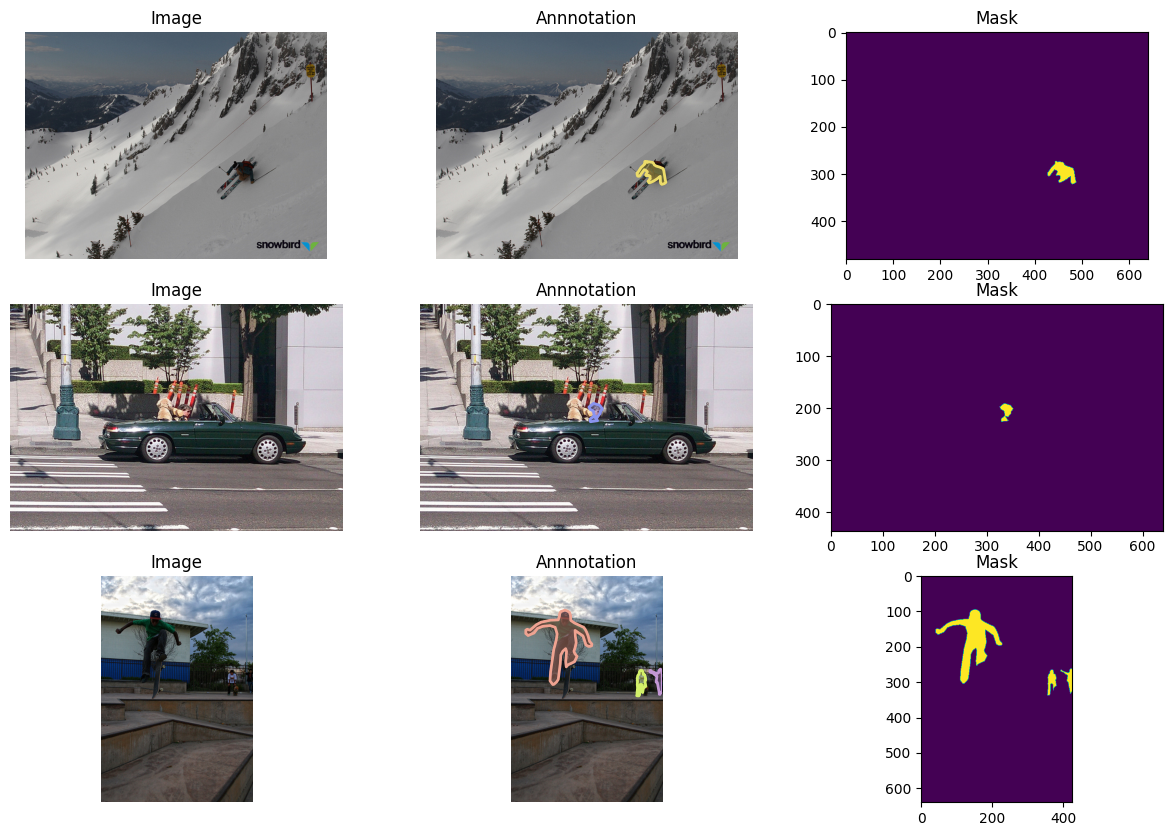

In [ ]:
plot_sample_images(coco_train, TRAIN_IMAGE_PATH)

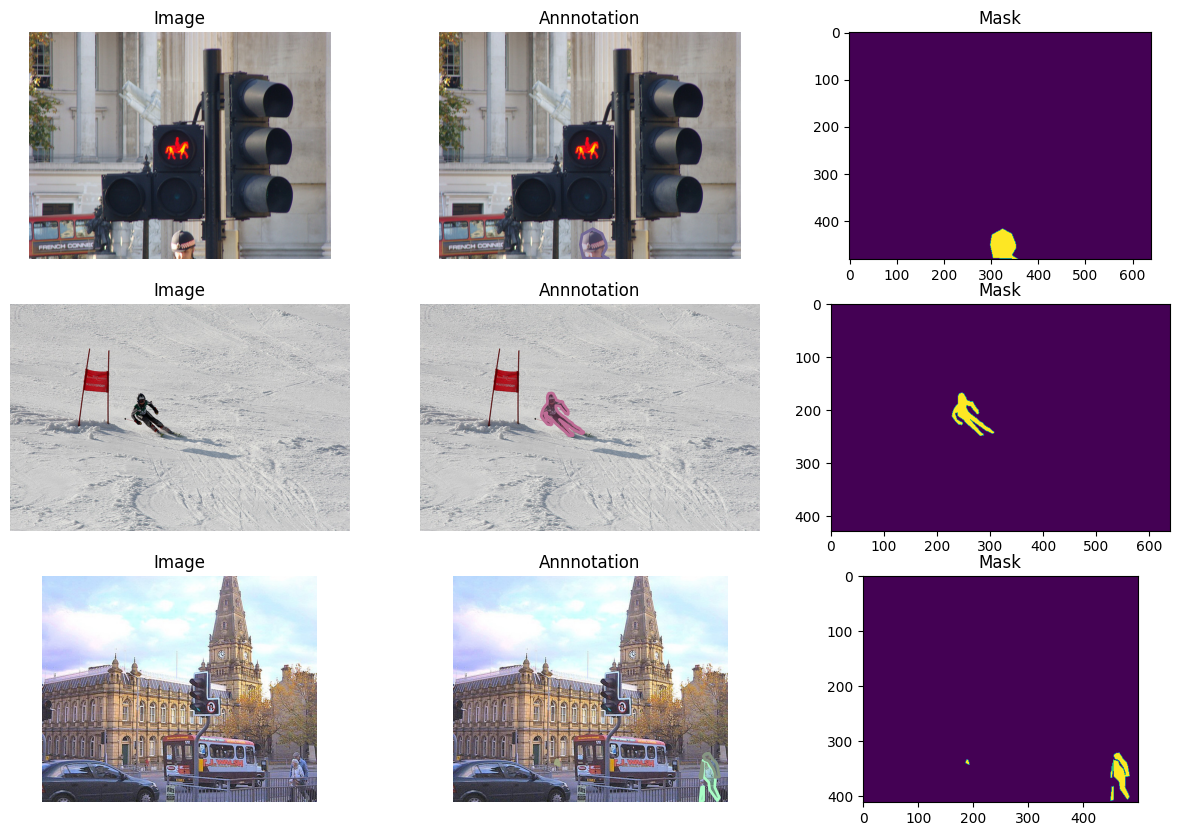

In [ ]:
plot_sample_images(coco_val, VAL_IMAGE_PATH)

In [ ]:
# Создаем генератор Data generator

class DataGen(utils.Sequence):

    def __init__(self, path_input, path_mask, batch_size = 8, image_size = (128, 128)):

        self.ids = os.listdir(path_mask)
        self.path_input = path_input
        self.path_mask = path_mask
        self.batch_size = batch_size
        self.image_size = image_size

    def __load__(self , id_name):
        image_path = os.path.join(self.path_input , id_name)
        mask_path = os.path.join(self.path_mask , id_name)

        image = cv2.imread(image_path , 1) # 1 specifies RGB format
        image = cv2.resize(image , self.image_size) # resizing before inserting to the network

        mask = cv2.imread(mask_path , -1)
        mask = cv2.resize(mask , self.image_size)
        mask = mask.reshape((self.image_size[0] , self.image_size[1] , 1))

        #normalize image
        image = image / 255.0
        mask = mask / 255.0

        return image , mask

    def __getitem__(self , index):

        if (index + 1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index * self.batch_size

        file_batch = self.ids[index * self.batch_size : (index + 1) * self.batch_size]
        images = []
        masks = []

        for id_name in file_batch :
            _img , _mask = self.__load__(id_name)
            images.append(_img)
            masks.append(_mask)
        images = np.array(images)
        masks = np.array(masks)


        return images , masks

    def __len__(self):
        return int(np.ceil(len(self.ids) / float(self.batch_size)))



In [ ]:
train_gen = DataGen(
    path_input = TRAIN_IMAGE_PATH,
    path_mask = TRAIN_MASK_PATH,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)
val_gen = DataGen(
    path_input =  VAL_IMAGE_PATH,
    path_mask =  VAL_MASK_PATH,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

In [ ]:
#  Модель

def down_block(input_tensor, no_filters, kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    pool = layers.MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)
    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    return conv

def up_block(
    input_tensor,
    no_filters,
    skip_connection,
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):


    conv = layers.Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(layers.UpSampling2D(size = upsampling_factor)(input_tensor))
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.concatenate( [skip_connection , conv]  , axis = -1)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    return conv

def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):

    conv = layers.Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    conv = layers.Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    return conv

def UNet(input_shape = (128,128,3)):

    filter_size = [64,128,256,512,1024]
    inputs = Input(shape=input_shape)

    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")
    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    output = output_block(input_tensor=u1 ,
                         padding = "same",
                         kernel_initializer= "he_normal")
    model = models.Model(inputs = inputs , outputs = output)
    return model

In [ ]:
model = UNet(input_shape = INPUT_SHAPE)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0

In [ ]:
# Обучение

def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = backend.flatten(y_true)
    y_pred_f = backend.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * backend.sum(intersection) + smooth) / (backend.sum(y_true_f) + backend.sum(y_pred_f) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    return losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

def iou_coef(y_true, y_pred, smooth=1):
    intersection = backend.sum(backend.abs(y_true * y_pred), axis=[1,2,3])
    union = backend.sum(y_true,[1,2,3])+backend.sum(y_pred,[1,2,3])-intersection
    iou = backend.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

In [ ]:
initial_learning_rate = 1e-4

model.compile(
    optimizer = optimizers.Adam(lr = initial_learning_rate),
    loss = bce_dice_loss,
    metrics = [iou_coef]
)

In [ ]:
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * np.exp(-k*epoch)
callbacks_list = [
    callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        patience = 2,
        verbose = 1,
        min_lr=1e-7),
    callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 5,
        verbose = 1,
        restore_best_weights = True),
    callbacks.ModelCheckpoint(
        filepath=CHECKPOINT_PATH + 'unet_best_model.hdf5',
        monitor='val_loss',
        verbose=1,
        save_best_only=True),
    callbacks.LearningRateScheduler(
        lr_exp_decay,
        verbose=1
    )
]

In [ ]:
len(train_gen)

188


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
188/188 [==============================] - ETA: 0s - loss: 1.0221 - iou_coef: 0.1711
Epoch 1: val_loss improved from inf to 1.07883, saving model to /models/unet_best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 21ms/step


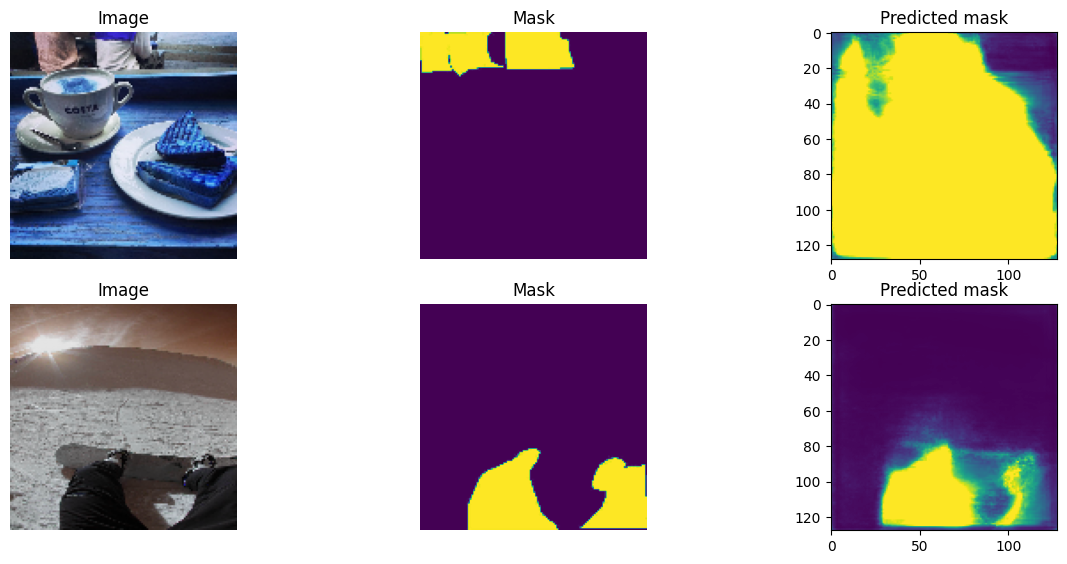


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
375/375 [==============================] - ETA: 0s - loss: 0.9224 - iou_coef: 0.1988
Epoch 1: val_loss improved from 1.07883 to 0.99855, saving model to /models/unet_best_model.hdf5
1/1 [==============================] - 0s 21ms/step


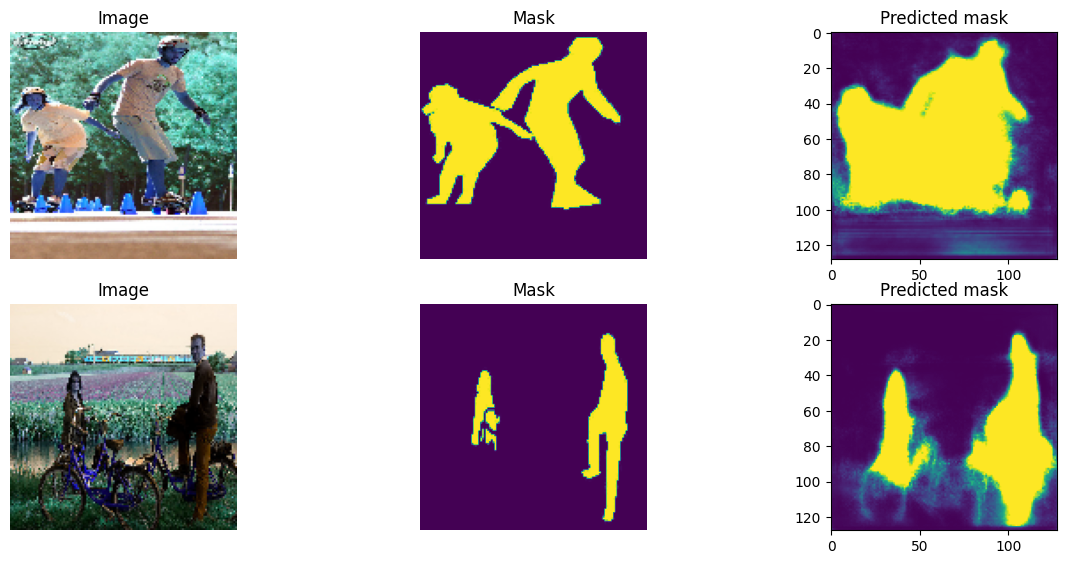

In [ ]:
epochs = 2
for _ in range(epochs):
    history = model.fit(
        train_gen,
        validation_data = val_gen,
        epochs=1,
        callbacks=callbacks_list,
        steps_per_epoch=len(train_gen),
        validation_steps = len(val_gen)
    )
    plot_sample_predictions(model, train_gen, count_images=2)